In [2]:
using Turing

In [3]:
using Mamba: describe, plot

In [4]:
@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

gdemo (generic function with 2 methods)

In [11]:
c1 = sample(gdemo([1.5, 2]), SMC(1000));
c6 = sample(gdemo([1.5, 2]), NUTS(1000,  0.65));

[Turing]:  Assume - `s` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Observe - `x` is an observation
 @~(::ANY, ::ANY) at compiler.jl:57
[Turing]:  Assume - `s` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Observe - `x` is an observation
 @~(::ANY, ::ANY) at compiler.jl:57
[Turing] looking for good initial eps...
[Turing.NUTS] found initial ϵ: 1.6


[NUTS] Sampling... 59%  ETA: 0:00:03
  ϵ:           0.42240560887224077
  tree_depth:  2
cond:    [0.780741, 0.737746]

[NUTS] Finished with
  Running time        = 4.910362000000005;
  #lf / sample        = 11.467;
  #evals / sample     = 0.002;
  pre-cond. diag mat  = [0.780741, 0.737746].


[NUTS] Sampling...100% Time: 0:00:05


In [14]:
p = plot(c1);

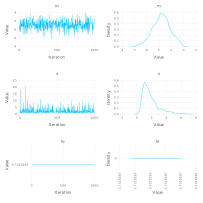

Press ENTER to draw next plot
STDIN> 


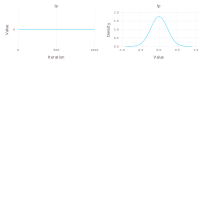

In [15]:
Mamba.draw(p)

In [16]:
using Distributions

In [17]:
TPATH = Pkg.dir("Turing")


"/home/ares/.julia/v0.6/Turing"

In [18]:
include(TPATH*"/example-models/nips-2017/gmm.helper.jl");

In [19]:
@model GMM(p, μ, σ) = begin
  z ~ Categorical(p)
  x ~ Normal(μ[z], σ[z])
end

@model cGMM(p, μ, σ) = begin
  x ~ UnivariateGMM2(μ, σ, Categorical(p));
end

M = 5
p = [ 0.2,  0.2,   0.2, 0.2,  0.2]

s = [-0.5, -1.5, -0.75,  -2, -0.5]; σ = exp(s);

μ1 = [   0,    1,     2, 3.5, 4.25] + 2.5 * collect(0:4);
μ2 = [   0,    1,     2, 3.5, 4.25] + 0.5 * collect(0:4);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] include_string(::Module, ::String, ::String) at /home/ares/.julia/v0.6/Compat/src/Compat.jl:71
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/ares/.julia/v0.6/IJulia/src/execute_request.jl:158
 [6] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/ares/.julia/v0.6/Compat/src/Compat.jl:385
 [7] eventloop(::ZMQ.Socket) at /home/ares/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[19], in expression starting on line 13


In [20]:
p1 = plot([make_norm_pdf(p, μ1, σ)], -20, 20, Theme(default_color=colors[1]), 
Guide.xlabel(nothing), Guide.ylabel("Density"), Guide.title("MoG with Seprated Mixtures"));
p2 = plot([make_norm_pdf(p, μ2, σ)], -20, 20, Theme(default_color=colors[2]),
Guide.xlabel(nothing), Guide.ylabel("Density"), Guide.title("MoG with Nearby Mixtures"));

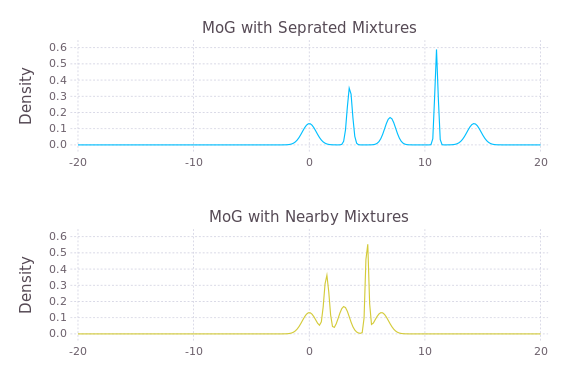

In [21]:
draw(PNG(15cm, 10cm), vstack(p1, p2));

In [27]:
N = 10000; K = 500;
gibbs = Gibbs(round(Int,N/K), PG(10, 1, :z), HMC(K-1, 0.2, 4, :x); thin=false)
nuts  = NUTS(N, 0.2);

In [28]:
println("Running Gibbs")
chain_gibbs1 = sample(GMM(p, μ1, σ), gibbs)
x_gibbs1 = map(x_arr -> x_arr[1], chain_gibbs1[:x]);

println("Running NUTS")
chain_nuts1 = sample(cGMM(p, μ1, σ), nuts)
x_nuts1 = map(x_arr -> x_arr[1], chain_nuts1[:x]);

Running Gibbs
[Turing]:  Assume - `z` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `x` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76


[Gibbs] Sampling... 55%  ETA: 0:00:02

[Gibbs] Finished with
  Running time    = 3.2712329999999894;


[Gibbs] Sampling...100% Time: 0:00:04


Running NUTS
[Turing]:  Assume - `x` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] _mixlogpdf1(::Turing.UnivariateGMM2{Float64}, ::Float64) at /home/ares/.julia/v0.6/Turing/src/samplers/support/distributions.jl:77
 [4] logpdf_with_trans(::Turing.UnivariateGMM2{Float64}, ::Float64, ::Bool) at /home/ares/.julia/v0.6/Turing/src/transform.jl:64
 [5] assume(::Void, ::Turing.UnivariateGMM2{Float64}, ::Turing.VarReplay.VarName, ::Turing.VarReplay.VarInfo) at /home/ares/.julia/v0.6/Turing/src/samplers/sampler.jl:47
 [6] macro expansion at /home/ares/.julia/v0.6/Turing/src/core/compiler.jl:98 [inlined]
 [7] ##cGMM_model#838(::Turing.VarReplay.VarInfo, ::Void) at ./In[19]:7
 [8] #sample#62(::Int64, ::Bool, ::Void, ::Int64, ::Stan.Adapt, ::Function, ::Function, ::Turing.NUTS) at /home/ares/.julia/v0.6/Turing/src/samplers/hmc.jl:112
 [9] sample(::Function, ::Turing.NUTS) at /home/ares/.julia/v0.6/Turing/src/samplers/hmc.jl:86
 [10] include_string(::S

[Turing] looking for good initial eps...
[Turing.NUTS] found initial ϵ: 1.6
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 veri

[NUTS] Sampling...  1%  ETA: 0:02:03

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has


  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling...  5%  ETA: 0:00:47
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling...  8%  ETA: 0:00:37
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 12%  ETA: 0:00:33
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 15%  ETA: 0:00:30
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 18%  ETA: 0:00:28
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 22%  ETA: 0:00:26
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 25%  ETA: 0:00:25
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 28%  ETA: 0:00:24
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 30%  ETA: 0:00:24
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 33%  ETA: 0:00:23
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 36%  ETA: 0:00:22
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 39%  ETA: 0:00:21
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 42%  ETA: 0:00:19
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 46%  ETA: 0:00:18
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 49%  ETA: 0:00:17
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 52%  ETA: 0:00:16
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 56%  ETA: 0:00:15
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 59%  ETA: 0:00:13
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 62%  ETA: 0:00:12
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 66%  ETA: 0:00:11
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 69%  ETA: 0:00:10
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 71%  ETA: 0:00:09
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 75%  ETA: 0:00:08
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 78%  ETA: 0:00:07
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 80%  ETA: 0:00:06
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 83%  ETA: 0:00:05
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 87%  ETA: 0:00:04
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 90%  ETA: 0:00:03
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 93%  ETA: 0:00:02
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 96%  ETA: 0:00:01
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling...100%  ETA: 0:00:00
  ϵ:           28.33271923896247
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling...100% Time: 0:00:33


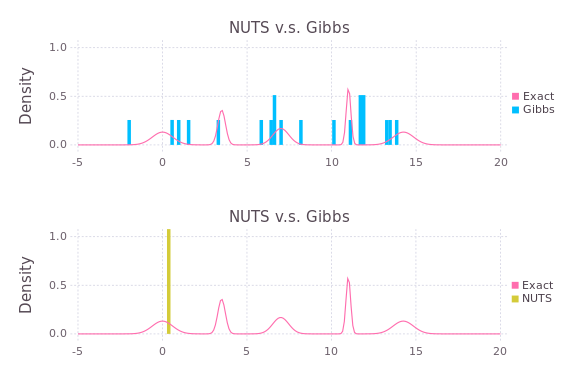

In [29]:
visualize(x_gibbs1, x_nuts1, μ1);

In [25]:
println("Running Gibbs")
chain_gibbs2 = sample(GMM(p, μ2, σ), gibbs)
x_gibbs2 = map(x_arr -> x_arr[1], chain_gibbs2[:x]);

println("Running NUTS")
chain_nuts2 = sample(cGMM(p, μ2, σ), nuts)
x_nuts2 = map(x_arr -> x_arr[1], chain_nuts2[:x]);

Running Gibbs
[Turing]:  Assume - `z` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `x` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76


[Gibbs] Sampling... 60%  ETA: 0:00:02

[Gibbs] Finished with
  Running time    = 3.0765569999999958;


[Gibbs] Sampling...100% Time: 0:00:03


Running NUTS
[Turing]:  Assume - `x` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] _mixlogpdf1(::Turing.UnivariateGMM2{Float64}, ::Float64) at /home/ares/.julia/v0.6/Turing/src/samplers/support/distributions.jl:77
 [4] logpdf_with_trans(::Turing.UnivariateGMM2{Float64}, ::Float64, ::Bool) at /home/ares/.julia/v0.6/Turing/src/transform.jl:64
 [5] assume(::Void, ::Turing.UnivariateGMM2{Float64}, ::Turing.VarReplay.VarName, ::Turing.VarReplay.VarInfo) at /home/ares/.julia/v0.6/Turing/src/samplers/sampler.jl:47
 [6] macro expansion at /home/ares/.julia/v0.6/Turing/src/core/compiler.jl:98 [inlined]
 [7] ##cGMM_model#836(::Turing.VarReplay.VarInfo, ::Void) at ./In[19]:7
 [8] #sample#62(::Int64, ::Bool, ::Void, ::Int64, ::Stan.Adapt, ::Function, ::Function, ::Turing.NUTS) at /home/ares/.julia/v0.6/Turing/src/samplers/hmc.jl:112
 [9] sample(::Function, ::Turing.NUTS) at /home/ares/.julia/v0.6/Turing/src/samplers/hmc.jl:86
 [10] include_string(::S

[Turing] looking for good initial eps...
[Turing.NUTS] found initial ϵ: 0.4
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 veri

[NUTS] Sampling...  1%  ETA: 0:02:06

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has


  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling...  5%  ETA: 0:00:46
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling...  8%  ETA: 0:00:37

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 12%  ETA: 0:00:33
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 15%  ETA: 0:00:31
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 18%  ETA: 0:00:29
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 21%  ETA: 0:00:28
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 24%  ETA: 0:00:27
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 27%  ETA: 0:00:25
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 30%  ETA: 0:00:24
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 33%  ETA: 0:00:23
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 36%  ETA: 0:00:22
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 39%  ETA: 0:00:21
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 42%  ETA: 0:00:20
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 45%  ETA: 0:00:19
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 48%  ETA: 0:00:17
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 51%  ETA: 0:00:17
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 54%  ETA: 0:00:16
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 57%  ETA: 0:00:15
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 60%  ETA: 0:00:13
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 64%  ETA: 0:00:12
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 67%  ETA: 0:00:11
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 71%  ETA: 0:00:10
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 74%  ETA: 0:00:09
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 77%  ETA: 0:00:08
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 80%  ETA: 0:00:07
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 83%  ETA: 0:00:06
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 86%  ETA: 0:00:05
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 88%  ETA: 0:00:04
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 90%  ETA: 0:00:03
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 93%  ETA: 0:00:02
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling... 97%  ETA: 0:00:01
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has

[NUTS] Sampling...100%  ETA: 0:00:00
  ϵ:           4.570072360669043
  tree_depth:  0
  pre_cond:    [1.0]

[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.WARNING]: Numerical error has been found in gradients.
 verifygrad(::Array{Float64,1}) at ad.jl:87
[NUTS] Finished with
  Running time        = 33.15482100000001;
  #lf / sample        = 1.0003;
  #evals / sample     = 0.0002;
  pre-cond. diag mat  = [1.0].


[NUTS] Sampling...100% Time: 0:00:34


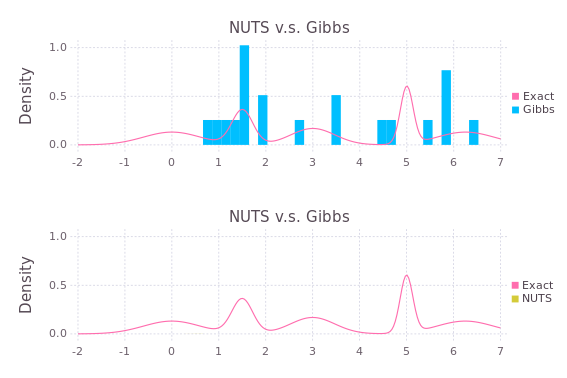

In [26]:
visualize(x_gibbs2, x_nuts2, μ2, -2, 7);